In [11]:
import os
import sys

sys.path.insert(0, os.path.dirname(os.getcwd()))

# Plotly Demo

Building plots in plotly feels a lot like Bokeh, which shouldn't be surprising, since they both basically want to construct JSON over and over.
We miss out on the ColumnDataSource abstraction, which is nice, so we're back to passing in raw lists of data

- [Number of Offenses per Month](#Number-of-Offenses-per-Month)
- [Number of Shootings per Month](#Number-of-Shootings-per-Month)
- [Top 10 Offense Code Groups](#Top-10-Offense-Code-Groups)
- [Number of Offenses per Day of Week and Hour of Day](#Number-of-Offenses-per-Day-of-Week-and-Hour-of-Day)

In [12]:
import plotly.express as px
import plotly.graph_objects as go
from load_data import load_data
from config import RED
import pandas as pd
import plotly.figure_factory as ff
import plotly.io as pio

pio.templates.default = 'ggplot2'

df = load_data()

# Number of Offenses per Month

In [13]:
num_offenses = df.resample('M', on='OCCURRED_ON_DATE')['INCIDENT_NUMBER'].agg(counts='count').reset_index()

Much like Bokeh, we declare a figure and get to work. I'm using the medium-level api, since that is most common, especially for making dashboards.

One nice thing introduced in 4.0 is that all the `add_*` and `update_*` figure methods now return the figure, letting us do some nice method chaining

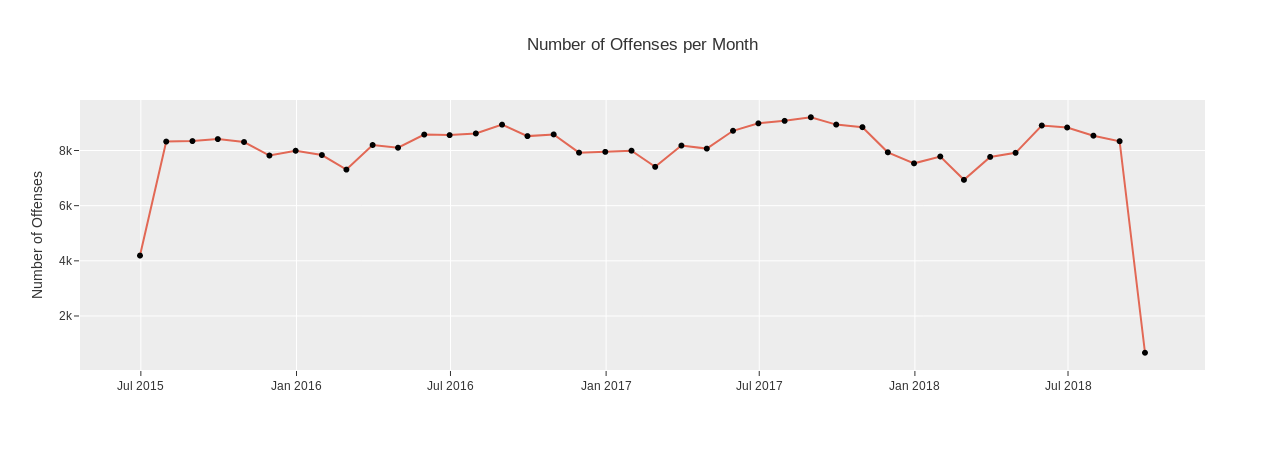

In [14]:
fig = go.Figure()
(
    fig
    .update_layout(title_text="Number of Offenses per Month",yaxis_title_text="Number of Offenses")
    .update_layout(shapes=[go.layout.Shape(type="line", xref="paper", x0=0, x1=1, y0=num_offenses.counts.mean(), y1=num_offenses.counts.mean(), line_color=RED, line_dash='dash')])
    .add_scatter(x=num_offenses.OCCURRED_ON_DATE, y=num_offenses.counts,line_color=RED, mode='markers+lines', marker_color="black", hovertemplate="Number of Offenses: %{y:0d}<extra></extra>")
    .show())

# Number of Shootings per Month

The hovertemplate method feels a bit more clunky than Bokeh's hovertool, but it is quite flexible

In [15]:
num_shootings = df.resample('M', on='OCCURRED_ON_DATE')['SHOOTING'].agg(num_shootings='sum').reset_index()

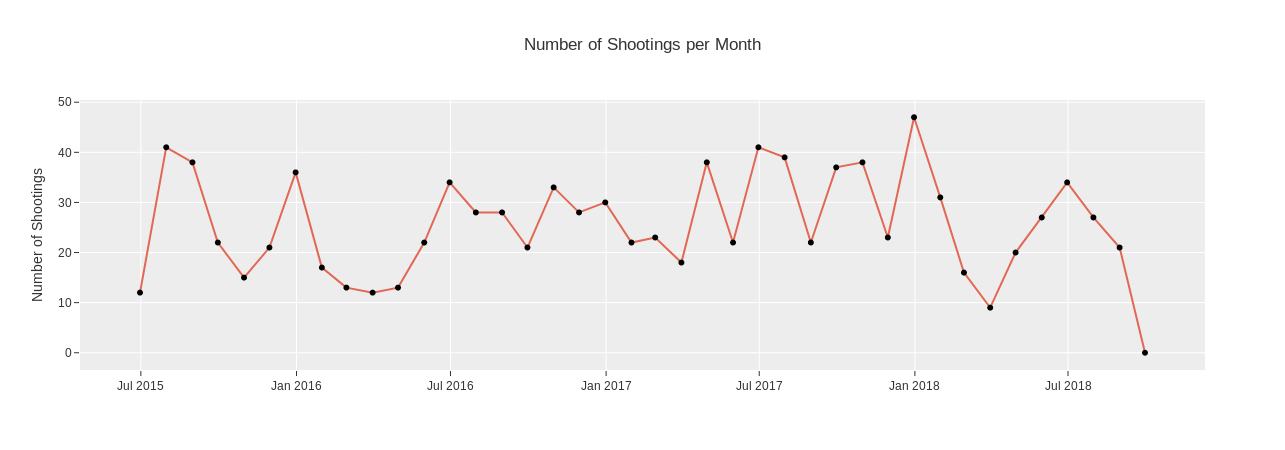

In [16]:
fig = go.Figure()
(
    fig
    .update_layout(title_text="Number of Shootings per Month", yaxis_title_text="Number of Shootings")
    .update_layout(shapes=[go.layout.Shape(type="line", xref="paper", x0=0, x1=1, y0=num_shootings.num_shootings.mean(), y1=num_shootings.num_shootings.mean(), line_color=RED, line_dash="dash")])
    .add_scatter(x=num_shootings.OCCURRED_ON_DATE, y=num_shootings.num_shootings, line_color=RED, mode='lines+markers', marker_color="black", hovertemplate="Number of Shootings: %{y:0d}<extra></extra>")
    .show()

)

# Top 10 Offense Code Groups

Being able to specify more properties in the `add_bar` method, definitely cuts down on the amount of code

In [17]:
top10_code_groups = df.OFFENSE_CODE_GROUP.value_counts().iloc[:10].sort_values(ascending=True)

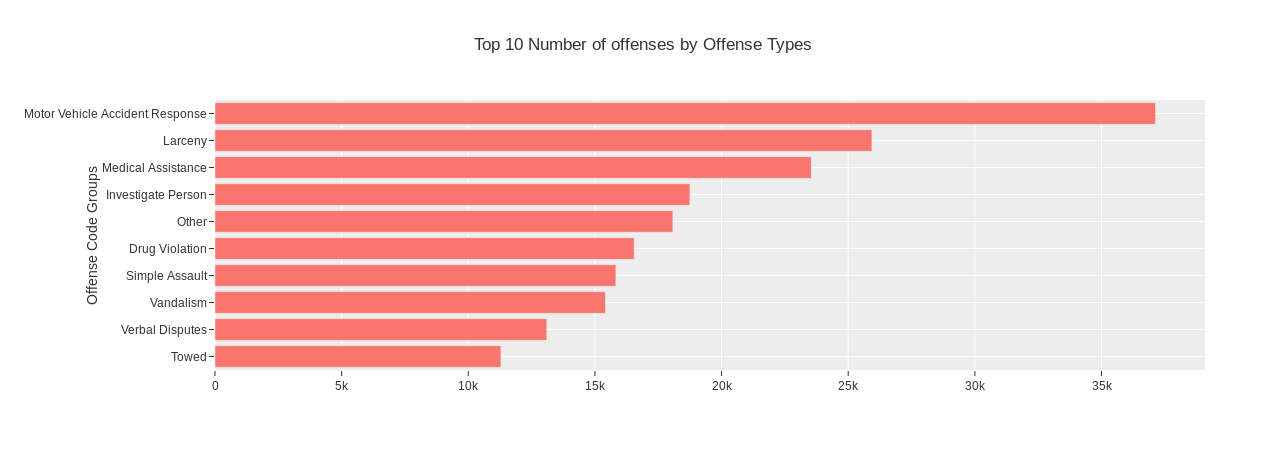

In [18]:
fig = go.Figure()

(fig
 .update_layout(title_text="Top 10 Number of offenses by Offense Types", yaxis_title_text="Offense Code Groups")
 .add_bar(y=top10_code_groups.index, x=top10_code_groups.values, orientation='h', hovertemplate="Number of Offenses: %{x:.3s}<extra></extra>")
 .show()
)

# Number of Offenses per Day of Week and Hour of Day

For certain, more complicated plots, plotly has a set of figure factories, basically precanned figure definitions that generate an entire figure.

An annotated heatmap is one of them, and is much easier than what I tried to by "by hand", before I noticed it!

The main problem, is that since they generate an entire figure, it's not easy to make work with the subplots functionality, if that is needed.

In [19]:
heatmap = pd.crosstab(df.DAY_OF_WEEK, df.HOUR)

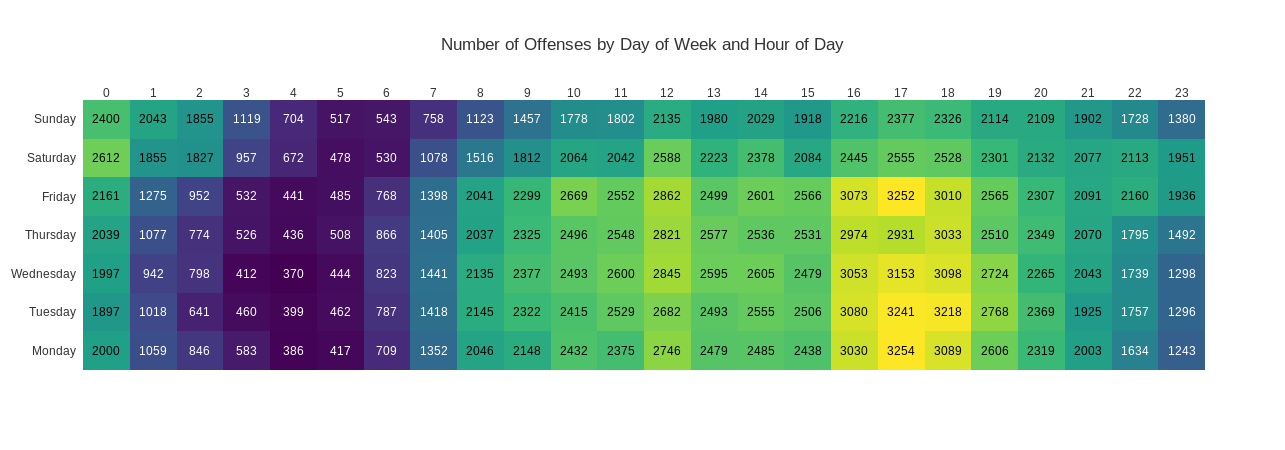

In [10]:
fig = ff.create_annotated_heatmap(heatmap.values, x=heatmap.columns.to_list(), y=heatmap.index.to_list(), annotation_text=heatmap.values, colorscale='viridis')

fig.update_layout(title_text="Number of Offenses by Day of Week and Hour of Day", xaxis_nticks=24)

fig.show()